In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
%matplotlib inline
 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPool2D, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model
import cv2
from keras import optimizers
 
from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf

In [2]:
path = 'C:/Users/bijes/Downloads/Downloads/Dataset-20210307T161010Z-001/Dataset/Training/'

for img_class in os.listdir("C:/Users/bijes/Downloads/Dataset-20210307T161010Z-001/Dataset/Training/"):
    print(str(len(os.listdir("C:/Users/bijes/Downloads/Dataset-20210307T161010Z-001/Dataset/Training/" + img_class))) + " " + img_class + " images")

1126 A images
1010 B images
1144 C images
1196 D images
957 E images
1204 F images
1090 G images
1013 H images
1162 I images
1114 K images
1241 L images
1055 M images
1151 N images
1196 O images
1088 P images
1279 Q images
1294 R images
1199 S images
1186 T images
1161 U images
1082 V images
1225 W images
1164 X images
1118 Y images


In [3]:
for img_class in os.listdir("C:/Users/bijes/Downloads/Dataset-20210307T161010Z-001/Dataset/Test/"):
    print(str(len(os.listdir("C:/Users/bijes/Downloads/Dataset-20210307T161010Z-001/Dataset/Test/" + img_class))) + " " + img_class + " images")

331 A images
432 B images
310 C images
245 D images
498 E images
247 F images
348 G images
436 H images
288 I images
331 K images
209 L images
394 M images
291 N images
246 O images
347 P images
164 Q images
144 R images
246 S images
248 T images
266 U images
346 V images
206 W images
267 X images
332 Y images


In [6]:
img_size_train = 28
img_size = 28
batch_size = 32

datagen_train = ImageDataGenerator(horizontal_flip=True)

train_generator = datagen_train.flow_from_directory("C:/Users/bijes/Downloads/Dataset-20210307T161010Z-001/Dataset/Training/",
                                                    target_size=(img_size_train,img_size_train),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_validation.flow_from_directory("C:/Users/bijes/Downloads/Dataset-20210307T161010Z-001/Dataset/Test/",
                                                    target_size=(img_size,img_size),
                                                    color_mode="grayscale",
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    shuffle=True)

Found 27455 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [7]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(24, activation='softmax'))

#opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)
#model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
sgd = optimizers.SGD(lr=1e-2)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)              

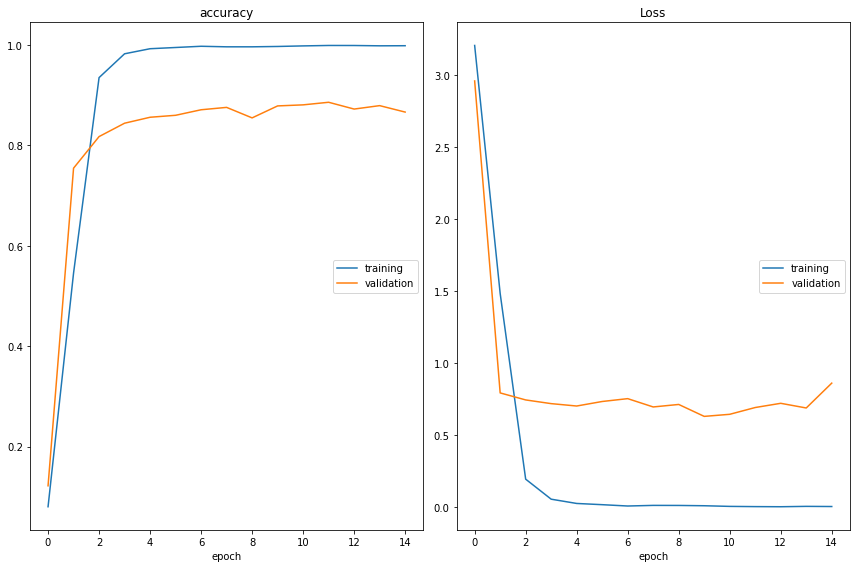

accuracy
	training         	 (min:    0.080, max:    0.999, cur:    0.999)
	validation       	 (min:    0.122, max:    0.886, cur:    0.866)
Loss
	training         	 (min:    0.002, max:    3.209, cur:    0.004)
	validation       	 (min:    0.630, max:    2.962, cur:    0.862)

Epoch 00015: val_accuracy did not improve from 0.88602


In [8]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
#                              patience=2, min_lr=0.00001, mode='auto')
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
#checkpoint = ModelCheckpoint('sign_lan.h5',monitor ='val_acc',verbose=1,save_best_only=True,mode='max')
#checkpoint = ModelCheckpoint('sign_lan.h5',monitor ='val_acc',verbose=1,save_best_only=True,mode='max')
#earlystop = EarlyStopping(monitor = 'val_acc',verbose=1,mode='max')
checkpoint = ModelCheckpoint("model_weights_1.h5", monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)
# history = model.fit_generator(generator = train_datagen.flow(x_train,y_train,batch_size=32),
#                               validation_data = val_datagen.flow(x_test,y_test),epochs=15,verbose=1)

#earlystop = EarlyStopping(monitor = 'val_acc',verbose=1,mode='max')

callbacks = [PlotLossesKerasTF(),checkpoint]
 
history = model.fit(x=train_generator, steps_per_epoch=steps_per_epoch, epochs=epochs, validation_data = validation_generator, validation_steps = validation_steps, callbacks=callbacks)

In [9]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)